In [ ]:
# Directory of fruits
import os
directory_path = os.getcwd()
print("My current directory is : " + directory_path)
# define the train and test images path
train_dir = directory_path + '\\inputimages\\train\\'
test_dir = directory_path + '\\inputimages\\test\\'

In [ ]:
# list the image file(s)
for dirname, _, filenames in os.walk(test_dir):
    for filename in filenames:
        if filename.split(".")[-1] == "txt": 
            continue
        print(os.path.join(dirname, filename))

In [ ]:
fruits_name = []
fruits_image = []
fruits_dir = []
i = 0
for subdir in os.listdir(train_dir):
    fruits_dir.append(i) # name of the fruit i.e. label
    i += 1
    for image_filename in os.listdir(train_dir + subdir):
        if image_filename.split(".")[-1] == "txt":
            continue
        fruits_name.append(subdir) # name of the fruit 
        fruits_image.append(subdir + '/' + image_filename) # image of the fruit

In [ ]:
import pandas as pd # data processing, CSV file I/O
train_fruits = pd.DataFrame(fruits_name, columns=["Fruits"])
train_fruits["Fruits Image"] = fruits_image
train_fruits

In [ ]:
# count for each fruit
from collections import Counter
# newData is a dictionary
newData = Counter(train_fruits["Fruits"])
print("Found fruits in the data set and their corresponding count of image(s)")
# newData is dictionary
# newData2 is list of tuple 
newData2 = newData.most_common()
newData2

In [ ]:
# list each fruit
x,y = zip(*newData2)
x,y = list(x),list(y)
print("Found fruits: ", x)
print("Number of Images: ", y)

In [ ]:
# plot graphic for each fruit
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
ax= sns.barplot(x=x, y=y, palette=sns.color_palette("BuGn_r", 15)) 
plt.xlabel('Fruits', size = 20) 
plt.ylabel('Number of Fruits', size = 20 )
plt.xticks(rotation = 75)
plt.title('Found fruits in the data set and their number') 
plt.show()

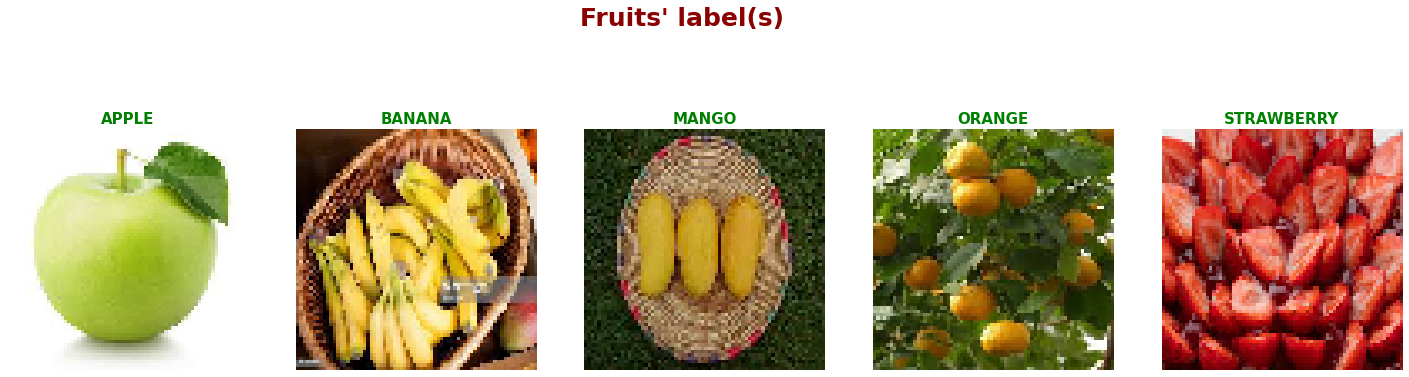

In [30]:
import cv2
from tensorflow.keras.utils import load_img
plt.figure(figsize=(25,16))
how_many_fruits = len(x)

for i in range(how_many_fruits):
    fruits = train_fruits[train_fruits["Fruits"] == x[i]]["Fruits Image"].values [1]    
    plt.subplot(3,5,i+1)
    img = load_img(train_dir + fruits, target_size=(72, 72))    
    plt.imshow(img)
    plt.title(x[i].upper(), color = "green", fontsize = 15 , fontweight = 600)
    plt.axis("off")

plt.suptitle("Fruits' label(s)", fontsize = 25 , color = "darkred", fontweight = 'bold')
plt.show()

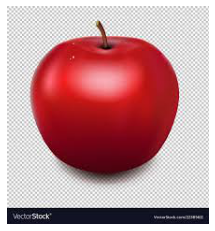

In [31]:
# open an image
img = load_img(train_dir + "/apple/image_19.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [32]:
# what is the shape of image?
from tensorflow.keras.utils import img_to_array
array_image = img_to_array(img)
print("Image Shape: ", array_image.shape)

Image Shape:  (233, 216, 3)


In [ ]:
# show how many type(s) of fruit
from glob import glob
fruitCountUnique = glob(train_dir + '/*' )
numberOfClass = len(fruitCountUnique)
print("How many different fruits: ", numberOfClass)

In [33]:
# import model 
import tensorflow as tf 
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

#import warnings
import warnings
warnings.filterwarnings('ignore')
model = Sequential()
# convolution layer (1 st)
model.add(Conv2D(
    filters=16, #32
    kernel_size = (5,5),
    input_shape = (72, 72, 3),
    activation = 'relu'))
# pooling layer (1st)
model.add(MaxPooling2D(pool_size=(2,2)))
# dropout layer (1st)
model.add(Dropout(0.1))

# convolution layer (2nd)
model.add(Conv2D(
    filters=32, #32
    kernel_size = (5,5),
    activation = 'relu'))
# pooling layer (2nd)
model.add(MaxPooling2D(pool_size=(2,2)))
# dropout layer (2nd )
model.add(Dropout(0.2))

# convlution layer (3rd)
model.add(Conv2D(
    filters=64,
    kernel_size = (5,5),
    activation = 'relu'))
# pooling layer (3rd)
model.add(MaxPooling2D(pool_size=(2,2)))
# dropout layer (3rd )
model.add(Dropout(0.3))
# flatten layer
model.add(Flatten())
# Dense layer
model.add(Dense(
    units=512, 
    activation='relu'))
# dropout layer
# model.add(Dropout(0.2))
# output layer
model.add(Dense(
    units=numberOfClass, 
    activation='softmax')) 

In [34]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 68, 68, 16)        1216      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 34, 34, 16)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 34, 34, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        12832     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)       

In [37]:
# number of training
epochs = 100  
# get 32 per training
batch_size = 32

In [38]:
print("Target Size: ", array_image.shape[:2])

Target Size:  (233, 216)


In [39]:
array_image.shape

(233, 216, 3)

In [40]:
# normalize from 0~255 to 0~1
train_datagen = ImageDataGenerator(rescale= 1./255,
                   shear_range = 0.3,
                   horizontal_flip=True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale=1./255)

In [41]:

train_generator = train_datagen.flow_from_directory(
        train_dir, 
        target_size = (72, 72),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 1500 images belonging to 5 classes.


In [42]:

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size = (72, 72),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 500 images belonging to 5 classes.


In [43]:
# get the shape from train_generator
for data_batch, labels_batch in train_generator:
    print("data_batch shape: ", data_batch.shape)
    print("labels_batch shape: ", labels_batch.shape)
    break

data_batch shape:  (32, 72, 72, 3)
labels_batch shape:  (32, 5)


In [44]:
hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = (train_generator.samples) // batch_size,
        epochs=epochs,
        validation_data = test_generator,
        validation_steps = (test_generator.samples) // batch_size)
model.save('model.h5')

Epoch 1/100
46/46 [==============================] - 6s 124ms/step - loss: 1.6309 - accuracy: 0.2425 - val_loss: 1.4350 - val_accuracy: 0.3417
Epoch 2/100
46/46 [==============================] - 6s 120ms/step - loss: 1.4689 - accuracy: 0.3440 - val_loss: 1.3781 - val_accuracy: 0.3750
Epoch 3/100
46/46 [==============================] - 5s 118ms/step - loss: 1.4146 - accuracy: 0.3760 - val_loss: 1.3719 - val_accuracy: 0.4146
Epoch 4/100
46/46 [==============================] - 5s 117ms/step - loss: 1.3302 - accuracy: 0.4005 - val_loss: 1.2977 - val_accuracy: 0.4521
Epoch 5/100
46/46 [==============================] - 5s 118ms/step - loss: 1.2620 - accuracy: 0.4428 - val_loss: 1.1952 - val_accuracy: 0.4688
Epoch 6/100
46/46 [==============================] - 5s 118ms/step - loss: 1.2601 - accuracy: 0.4666 - val_loss: 1.3334 - val_accuracy: 0.4083
Epoch 7/100
46/46 [==============================] - 6s 121ms/step - loss: 1.2025 - accuracy: 0.5034 - val_loss: 1.1486 - val_accuracy: 0.5479

Epoch 58/100
46/46 [==============================] - 5s 116ms/step - loss: 0.4949 - accuracy: 0.8222 - val_loss: 1.4595 - val_accuracy: 0.6271
Epoch 59/100
46/46 [==============================] - 5s 116ms/step - loss: 0.4897 - accuracy: 0.8127 - val_loss: 1.4622 - val_accuracy: 0.6146
Epoch 60/100
46/46 [==============================] - 5s 116ms/step - loss: 0.4690 - accuracy: 0.8134 - val_loss: 1.4438 - val_accuracy: 0.6333
Epoch 61/100
46/46 [==============================] - 5s 116ms/step - loss: 0.4605 - accuracy: 0.8263 - val_loss: 1.4017 - val_accuracy: 0.6333
Epoch 62/100
46/46 [==============================] - 5s 116ms/step - loss: 0.4591 - accuracy: 0.8331 - val_loss: 1.4878 - val_accuracy: 0.6271
Epoch 63/100
46/46 [==============================] - 5s 114ms/step - loss: 0.4338 - accuracy: 0.8399 - val_loss: 1.6324 - val_accuracy: 0.6333
Epoch 64/100
46/46 [==============================] - 5s 115ms/step - loss: 0.4401 - accuracy: 0.8556 - val_loss: 1.6281 - val_accuracy:

In [45]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

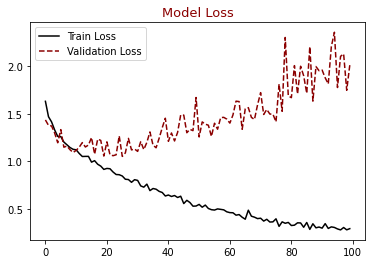

In [46]:
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

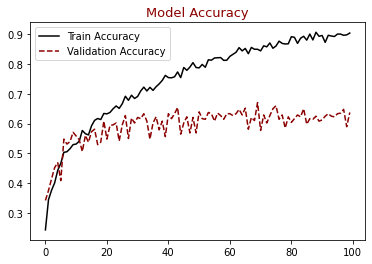

In [47]:
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()